In [2]:
import gymnasium
import numpy as np
import matplotlib.pyplot as plt
from evaluator import Evaluator

env = gymnasium.make("Gym-Gridworlds/Penalty-3x3-v0", render_mode="human")
env.reset()

n_states = env.observation_space.n
n_actions = env.action_space.n

R = np.zeros((n_states, n_actions))
P = np.zeros((n_states, n_actions, n_states))
T = np.zeros((n_states, n_actions))

for s in range(n_states):
    for a in range(n_actions):
        env.unwrapped.set_state(s)
        s_next, r, terminated, _, _ = env.step(a)
        R[s, a] = r
        P[s, a, s_next] = 1.0
        T[s, a] = terminated

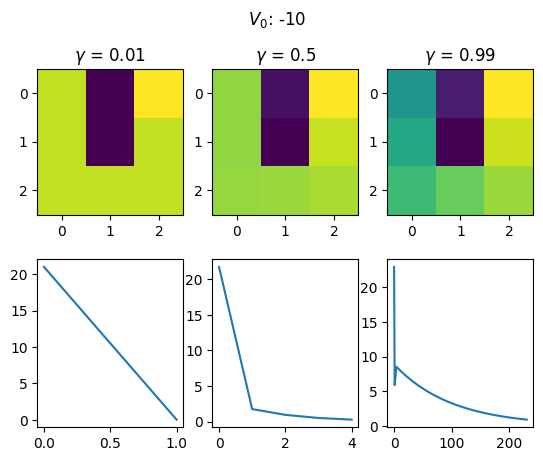

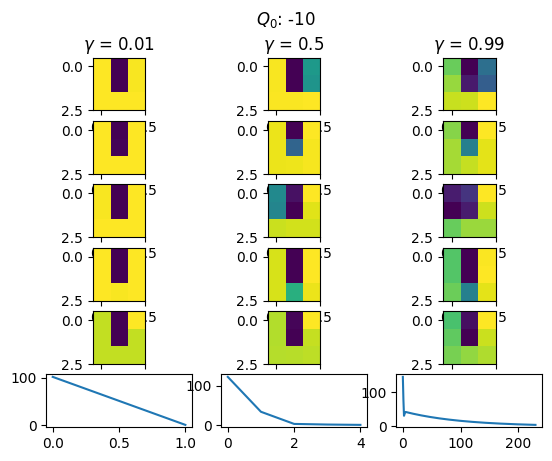

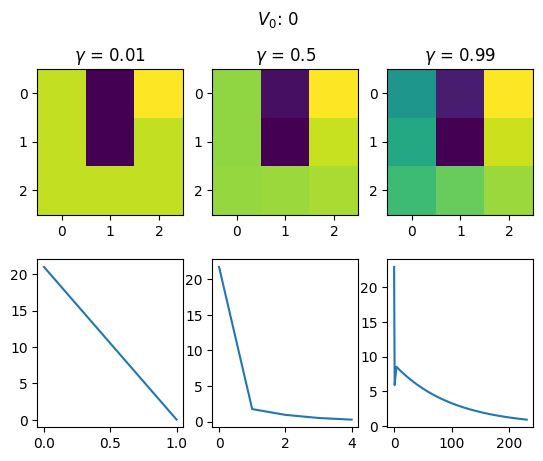

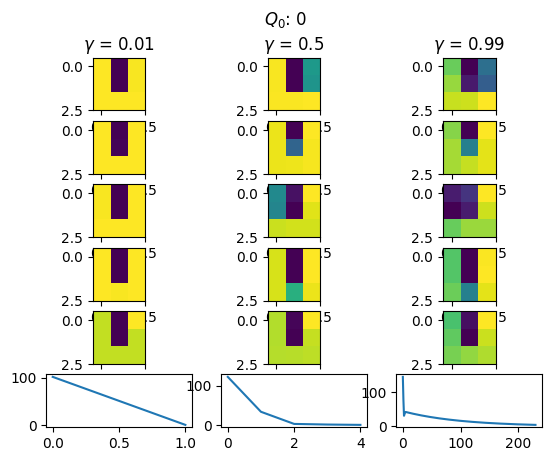

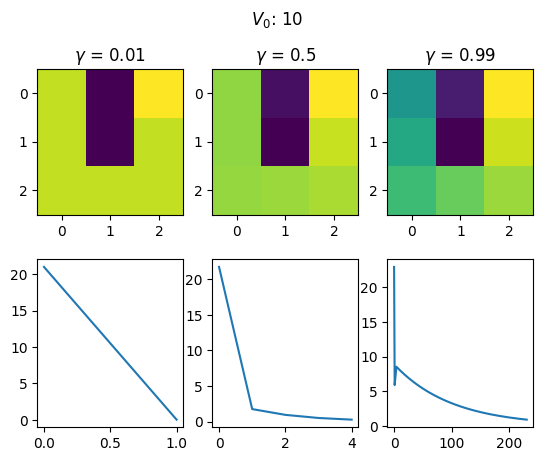

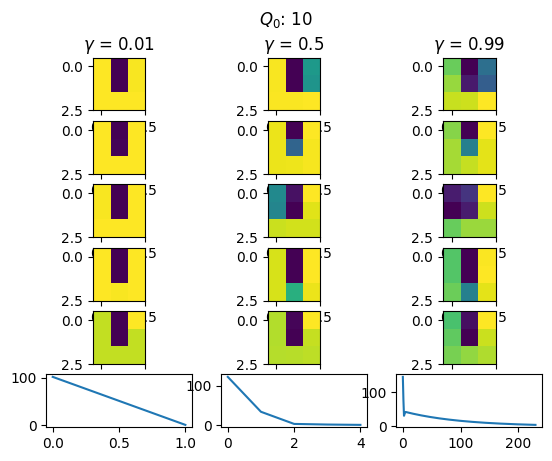

In [2]:
policy = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
])

def bellman_v(gamma, init_value):
    evaluator = Evaluator(env=env, initialization=init_value, gamma=gamma)
    evaluator.evaluate_state_values(policy=policy, R=R, P=P)
    values = evaluator.state_values.reshape(3,3)
    errors = evaluator.errors
    return values, errors

def bellman_q(gamma, init_value):
    evaluator = Evaluator(env=env, initialization=init_value, gamma=gamma)
    evaluator.evaluate_action_state_values(R=R, P=P)
    values = [evaluator.q_values[:, i].reshape(3,3) for i in range(n_actions)]
    errors = evaluator.errors
    return values, errors

gammas = [0.01, 0.5, 0.99]
for init_value in [-10, 0, 10]:
    fig, axs = plt.subplots(2, len(gammas))
    fig.suptitle(f"$V_0$: {init_value}")
    for i, gamma in enumerate(gammas):
        values, errors = bellman_v(gamma=gamma, init_value=init_value)
        axs[0][i].imshow(values)
        axs[1][i].plot(errors)
        axs[0][i].set_title(f'$\gamma$ = {gamma}')

    fig, axs = plt.subplots(n_actions + 1, len(gammas))
    fig.suptitle(f"$Q_0$: {init_value}")
    for i, gamma in enumerate(gammas):
        values, errors = bellman_q(gamma=gamma, init_value=init_value)
        for a in range(n_actions):
            axs[a][i].imshow(values[a])
        axs[-1][i].plot(errors)
        axs[0][i].set_title(f'$\gamma$ = {gamma}')

    plt.show()